In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from timeit import default_timer as timer

In [2]:
X_columns = ['X1','X2','X3','X4','X5']
Y_column = ['Y']
X = pd.read_csv('9_x.csv', names=X_columns)
Y = pd.read_csv('9_y.csv', names=Y_column)

In [3]:
# X.drop(columns = ['Y'],axis = 1, inplace=True)
X.insert(0,'Y', Y)
X

,Y,X1,X2,X3,X4,X5
0,322.347014,1.872210,-0.053886,1.217347,1.549342,0.802504
1,-78.356079,-0.349304,0.565206,-0.616031,-0.328979,-0.310498
2,101.931885,-1.294037,1.343213,1.212161,0.371647,0.860959
3,-76.642635,0.453526,-1.417965,-1.009070,-0.129641,0.609398
4,192.550955,1.618610,-0.651449,2.089519,-0.117038,-1.172400
...,...,...,...,...,...,...
203,-102.277598,-1.654530,-0.697678,-0.484309,0.708816,-0.021592
204,186.042455,0.420832,0.236400,1.532217,0.517378,-0.016130
205,-110.634098,0.627553,-1.231101,-1.238395,-0.661577,2.486825
206,-251.460147,-0.920144,0.204075,-1.028473,-1.683660,-0.064359


In [4]:
print(X.describe().round(2).T)

    count  mean     std     min    25%   50%    75%     max
Y   208.0  2.23  135.60 -347.90 -90.74  0.73  93.30  377.36
X1  208.0 -0.00    0.97   -2.34  -0.69  0.00   0.65    2.88
X2  208.0 -0.03    1.00   -2.51  -0.67 -0.02   0.62    2.49
X3  208.0  0.09    1.06   -2.43  -0.71  0.04   0.85    2.68
X4  208.0 -0.08    1.06   -2.90  -0.89 -0.01   0.60    2.92
X5  208.0  0.21    0.92   -2.38  -0.41  0.20   0.79    3.13


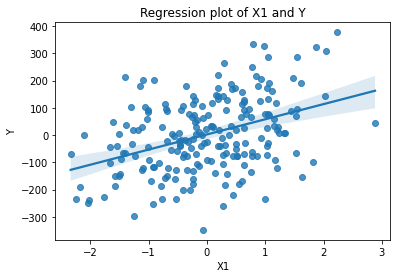

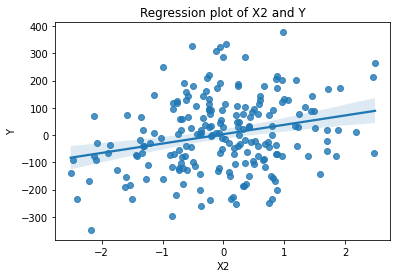

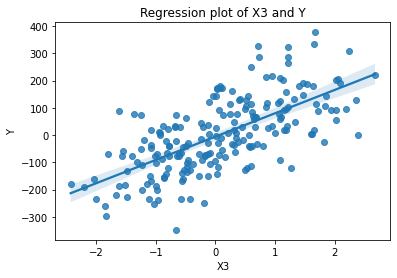

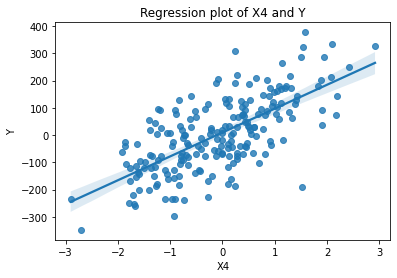

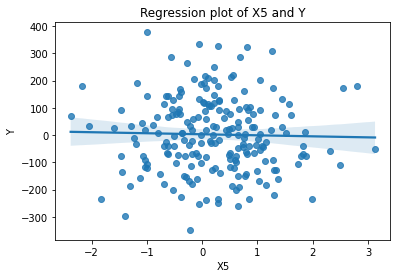

In [5]:
import seaborn as sns # Convention alias for Seaborn
import matplotlib.pyplot as plt
variables = ['X1', 'X2','X3','X4','X5']

for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='Y', data=X).set(title=f'Regression plot of {var} and Y');

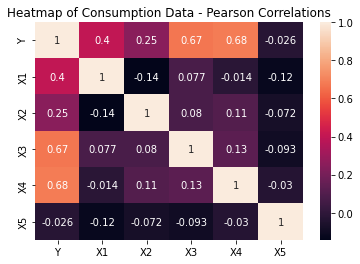

In [6]:
correlations = X.corr()
sns.heatmap(correlations, annot=True).set(title='Heatmap of Consumption Data - Pearson Correlations');

In [7]:
y = X['Y']
X = X[['X1', 'X2',
       'X3', 'X4','X5']]

In [9]:
from sklearn.model_selection import train_test_split
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [17]:
from sklearn.linear_model import LinearRegression
start = timer()
regressor = LinearRegression()
regressor.fit(X_train, y_train)
end = timer()
print(end - start,'- second')

0.010796265999999832 - second


In [19]:
regressor.intercept_

0.10832607704141584

In [20]:
regressor.coef_

array([56.0236965 , 28.52908583, 71.01061498, 76.59043869, 15.2884733 ])

In [21]:
y_pred = regressor.predict(X_test)

In [22]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

         Actual   Predicted
161 -140.340813 -138.742180
15   169.315700  154.153841
73    78.815187   70.767417
96    45.479446   27.922836
166    7.452949    0.593324
9     33.589199   28.583724
100  -77.882038  -86.125879
135  -79.787022  -81.210898
18   -32.846012  -28.498587
148  181.257969  180.431736
171  -58.190552  -61.701881
30   -23.610399  -10.252854
155  309.717331  309.111250
180   32.613094   57.017571
125  -68.118393  -60.565467
197  -29.147027  -21.131036
164  202.008581  206.378025
190 -200.393474 -208.653436
84  -114.361341 -108.517778
75  -238.636753 -242.559665
124 -247.667236 -239.677459
170    6.330157   13.626760
104  -94.941048  -84.896424
101   68.049961   53.338263
69   -76.456009  -77.114200
25  -121.870002 -128.667358
95     8.417976   13.409089
16   -20.430812  -15.338504
141  201.958809  195.346871
185  -66.409011  -58.778259
154   94.066107  100.274738
68   142.610210  135.792603
66   -15.601285  -22.982710
120   28.608674   36.688900
147   30.839915   38

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 7.56
Mean squared error: 80.91
Root mean squared error: 9.00


In [24]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.9945297965285171
